### Load Data and New Variable Creation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

t_df = pd.read_json("train.json") # training set
ts_df = pd.read_json("test.json") # test set

print 'Training Set Info'
print(type(t_df))
print(t_df.shape) # 49,352 obs and 15 vars
print(t_df.columns)
print 65*'-'
print 'Test Set Info'
print(type(ts_df))
print(ts_df.shape) # 74,659 obs and 14 vars (reponse var: interest_level not provided as expected)
print(ts_df.columns)
print 65*'-'

Training Set Info
<class 'pandas.core.frame.DataFrame'>
(49352, 15)
Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')
-----------------------------------------------------------------
Test Set Info
<class 'pandas.core.frame.DataFrame'>
(74659, 14)
Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'latitude', u'listing_id',
       u'longitude', u'manager_id', u'photos', u'price', u'street_address'],
      dtype='object')
-----------------------------------------------------------------


In [2]:
# Creating New variables: n_broadway
# training set:
import re
match_list = map(lambda x: re.search('broadway|b?way|b?wy',x.lower()), list(t_df['display_address']))

type_address=[]
for i in match_list:
    if i== None:
        type_address.append(0)
    elif i.group()== 'broadway' or i.group()== 'brwy' or i.group()== 'brway': #second filter
        type_address.append(1)
    else:
        type_address.append(0) 

t_df['n_broadway']= type_address # new variable starts by n_

# test set:
match_list = map(lambda x: re.search('broadway|b?way|b?wy',x.lower()), list(ts_df['display_address']))

type_address=[]
for i in match_list:
    if i== None:
        type_address.append(0)
    elif i.group()== 'broadway' or i.group()== 'brwy' or i.group()== 'brway': #second filter
        type_address.append(1)
    else:
        type_address.append(0) 

ts_df['n_broadway']= type_address # new variable starts by n_


In [3]:
# Creating new variables: n_num_keyfeat_score

# Training data:
match_list=[map(lambda x: re.search('elevator|cats|dogs|doorman|dishwasher|no fee|laundry|fitness',x.lower()),
                     list(t_df['features'])[i]) for i in np.arange(0,len(t_df['features']),1)]
nfeat_list =[] 
for i in match_list:
    if i==None:
        nfeat_list.append(0)
    else:
        if any(i)== False: # check to filter out lists with no all None values
            nfeat_list.append(0)
        else:
            lis1=[]
            map(lambda x: lis1.append(1) if x!= None else lis1.append(0),i)            
            nfeat_list.append(sum(lis1))

# new variable n_num_keyfeat_score 
nfeat_score=[]
for i in nfeat_list:
    if i<=5:
        nfeat_score.append(0)
    elif i==6:
        nfeat_score.append(1)
    elif i==7:
        nfeat_score.append(2)
    elif i==8:
        nfeat_score.append(3)
    elif i==9:
        nfeat_score.append(4)
    elif i==10:
        nfeat_score.append(5)
    else:
        nfeat_score.append(6)

t_df['n_num_keyfeat_score']= nfeat_score

# Test data:
match_list=[map(lambda x: re.search('elevator|cats|dogs|doorman|dishwasher|no fee|laundry|fitness',x.lower()),
                     list(ts_df['features'])[i]) for i in np.arange(0,len(ts_df['features']),1)]
nfeat_list =[] 
for i in match_list:
    if i==None:
        nfeat_list.append(0)
    else:
        if any(i)== False: # check to filter out lists with no all None values
            nfeat_list.append(0)
        else:
            lis1=[]
            map(lambda x: lis1.append(1) if x!= None else lis1.append(0),i)            
            nfeat_list.append(sum(lis1))

nfeat_score=[]
for i in nfeat_list:
    if i<=5:
        nfeat_score.append(0)
    elif i==6:
        nfeat_score.append(1)
    elif i==7:
        nfeat_score.append(2)
    elif i==8:
        nfeat_score.append(3)
    elif i==9:
        nfeat_score.append(4)
    elif i==10:
        nfeat_score.append(5)
    else:
        nfeat_score.append(6)

ts_df['n_num_keyfeat_score']= nfeat_score
 


In [4]:
# new variable: n_no_photo
# training set:
t_df['n_no_photo'] = [1 if i == 0 else 0 for i in map(len,t_df['photos'])]
# training set:
ts_df['n_no_photo'] = [1 if i == 0 else 0 for i in map(len,ts_df['photos'])]

In [5]:
# New Vars related to Price:
# new var: square price
# training set
t_df['n_price_sqrt'] = t_df['price']**(0.5)
# testing set
ts_df['n_price_sqrt'] = ts_df['price']**(0.5)

# new var: expensive
# training set
threshold_75p = t_df[['price']].describe().loc['75%','price']
t_df['n_expensive']=[1 if i > threshold_75p else 0 for i in list(t_df['price']) ]
# test set
threshold_75p = ts_df[['price']].describe().loc['75%','price']
ts_df['n_expensive']=[1 if i > threshold_75p else 0 for i in list(ts_df['price'])]

In [7]:
# new variables: extracted from features.py:

# new var: num_description_words:
# training set
t_df["num_description_words"] = t_df["description"].apply(lambda x: len(x.split(" ")))
# test set
ts_df["num_description_words"] = ts_df["description"].apply(lambda x: len(x.split(" ")))

# new var: has_phone:
# training set:
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = t_df['description'].str.extract(phone_regex)
t_df['has_phone']=[type(item)==unicode for item in has_phone]
# test set
phone_regex = "(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})" # http://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number
has_phone = ts_df['description'].str.extract(phone_regex)
ts_df['has_phone']=[type(item)==unicode for item in has_phone]

# dist_from_midtown:
# training:
from geopy.distance import vincenty
lat = t_df['latitude'].tolist()
long_ = t_df['longitude'].tolist()
midtown_lat = 40.7586
midtown_long = -73.9838
distance =[]
for i in range(len(lat)):
    distance.append(vincenty((lat[i],long[i]),(midtown_lat,midtown_long)).meters)
    t_df['distance_from_midtown'] = distance

# test:
from geopy.distance import vincenty
lat = ts_df['latitude'].tolist()
long_ = ts_df['longitude'].tolist()
midtown_lat = 40.7586
midtown_long = -73.9838
distance =[]
for i in range(len(lat)):
    distance.append(vincenty((lat[i],long[i]),(midtown_lat,midtown_long)).meters)
    ts_df['distance_from_midtown'] = distance


C:\Users\Carlo\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
C:\Users\Carlo\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


TypeError: 'type' object has no attribute '__getitem__'

## Setting Response and Predictor Variables

In [65]:
t_df.columns # training set cols

Index([            u'bathrooms',              u'bedrooms',
                 u'building_id',               u'created',
                 u'description',       u'display_address',
                    u'features',        u'interest_level',
                    u'latitude',            u'listing_id',
                   u'longitude',            u'manager_id',
                      u'photos',                 u'price',
              u'street_address',            u'n_broadway',
         u'n_num_keyfeat_score',            u'n_no_photo',
       u'num_description_words',             u'has_phone',
                    u'n_price2',           u'n_expensive',
                u'n_price_sqrt'],
      dtype='object')

In [74]:
import pandas as pd
import numpy as np
# predictor list with variables whom relevance has been tested:
pred_list = ['bedrooms','bathrooms','latitude','longitude',  
             'n_broadway','n_num_keyfeat_score','n_no_photo','num_description_words','has_phone','n_price_sqrt','n_expensive']



## separate the predictors and response in the training data set
x = np.array(t_df.loc[:, pred_list])
y = np.ravel(t_df.loc[:, 'interest_level'])
## separate the predictors and response in the test data set
x2 = np.array(ts_df.loc[:, pred_list])

### Export new DF to csv

In [29]:
ext = pred_list + ['interest_level']

t_df.loc[:, ext].loc[:, ext].to_csv('new_train.csv', encoding='utf-8')
#ts_df.to_csv('new_test.csv', encoding='utf-8')

### Logit Model: Selected Vars

In [75]:
### 1. Logit Model
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()
logit_1

logit_1.set_params(C=1e4) # is the inverse of regularization strength. 
# This is opposite to the alphaused in Ridge and Lasso. Smaller values specify stronger regularization.
logit_1.fit(x, y)
print 'Predictor Parameters are:',logit_1.get_params() 
print 65*'-'
print 'Predictor Coefficients are:',logit_1.coef_
print 'Intercept',logit_1.intercept_

Predictor Parameters are: {'warm_start': False, 'C': 10000.0, 'n_jobs': 1, 'verbose': 0, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': None, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'class_weight': None}
-----------------------------------------------------------------
Predictor Coefficients are: [[  6.37743176e-01   1.37177257e-01  -2.04157902e-01  -1.78470735e-01
   -2.32790512e-01   2.41656621e-01  -1.72913694e+00   5.98785059e-04
    1.80935852e-01  -1.63569161e-01   1.25730092e+00]
 [ -6.08947715e-01  -1.63500454e-01   8.72978741e-01   5.42250133e-01
    1.85387299e-01  -2.31727116e-01   2.23287877e+00  -1.35669299e-03
   -2.93671280e-01   1.22841374e-01  -7.45446077e-01]
 [  4.22251401e-01   7.32627522e-02  -2.69595283e-01  -1.70920019e-01
   -8.08492724e-02   1.85138244e-01  -1.93317749e+00   1.26411953e-03
    2.77532604e-01  -6.92502114e-02   2.24888330e-01]]
Intercept [ 0.0095834  -0.03388727

In [76]:
# 2) Accuracy on  Training Set
print 'Accuracy on training set:', logit_1.score(x,y) #0.69
print 'Misc.Error on training set:', 1- logit_1.score(x,y) #0.31

Accuracy on training set: 0.69271762036
Misc.Error on training set: 0.30728237964


In [77]:
# 3) Acid test: prediction and log-loss indicator
# http://stackoverflow.com/questions/35013822/log-loss-output-is-greater-than-1
# log-loss range is [0,inf] => the close to 0, the better
from sklearn import metrics 
y_pred = logit_1.predict(x)
y_pred_p = logit_1.predict_proba(x)
print 'Multi Class Log_loss:', metrics.log_loss(y,y_pred_p) # log_loss(x,y) => x= true label format [], x= predicted probs [[]]

Multi Class Log_loss: 0.695777225019


In [38]:
# 4) Cross-Validation:
import sklearn.cross_validation as cv

mean_error = []
std_error = []
kfold = range(3, 15)
for i in kfold:
    scores = cv.cross_val_score(logit_1, x, y, cv=i)
    mean_error.append(1-scores.mean())
    std_error.append(scores.std())
    
print 'Average Miscl. Error is %f'%(np.mean(mean_error))
print 'Average StDev Misc.Error is %f'%(np.mean(std_error))


Average Miscl. Error is 0.309800
Average StDev Misc.Error is 0.002759


Populating the interactive namespace from numpy and matplotlib


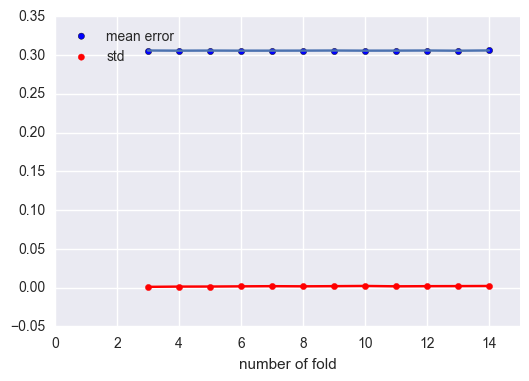

In [31]:
%pylab inline 
import matplotlib.pyplot as pl
s1 = pl.scatter(kfold, mean_error, label='mean error')
pl.plot(kfold, mean_error)
s2 = pl.scatter(kfold, std_error, color='red', label='std')
pl.plot(kfold, std_error, color='red')
pl.xlim(0, 15)
pl.xlabel('number of fold')
pl.legend(handles=[s1, s2], loc=2)

In [128]:
# 4) Using StatsModel:
import numpy as np
import statsmodels.api as sm

y_s = np.array(map(lambda y: y.encode('utf-8','ignore'),y))
y_s.astype(object)

y_low = [1 if i == 'low' else 0 for i in y_s]
y_med = [1 if i == 'medium' else 0 for i in y_s]
y_high = [1 if i == 'high' else 0 for i in y_s]

logit_mod_low = sm.Logit(x, y_low).fit()
logit_mod_med = sm.Logit(x, y_med).fit()
logit_mod_high = sm.Logit(x, y_high).fit()

print logit_mod_low.summary()
print logit_mod_med.summary()
print logit_mod_high.summary()

ValueError: endog must be in the unit interval.